# Predicting Closing price of stocks using LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential, load_model, save_model
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/doan/VNINDEX1.csv')
#data = data.set_index('time')
df['time'] = pd.to_datetime(df['time'])
#df = df.drop('Unnamed: 0', axis=1)
df

,time,close,open,high,low
0,2020-10-01,914.09,910.13,914.09,909.13
1,2020-10-02,909.91,914.09,916.67,897.72
2,2020-10-05,914.68,913.77,915.55,910.96
3,2020-10-06,915.67,918.11,918.93,912.77
4,2020-10-07,919.72,913.62,923.57,912.69
...,...,...,...,...,...
809,2023-12-25,1117.66,1103.06,1118.31,1103.06
810,2023-12-26,1122.25,1117.66,1123.11,1117.66
811,2023-12-27,1121.99,1122.25,1126.47,1121.99
812,2023-12-28,1128.93,1121.99,1130.58,1120.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    814 non-null    datetime64[ns]
 1   close   814 non-null    float64       
 2   open    814 non-null    float64       
 3   high    814 non-null    float64       
 4   low     814 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 31.9 KB


In [ ]:
data = df.filter(['close'])

dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .80))
training_data_len

652

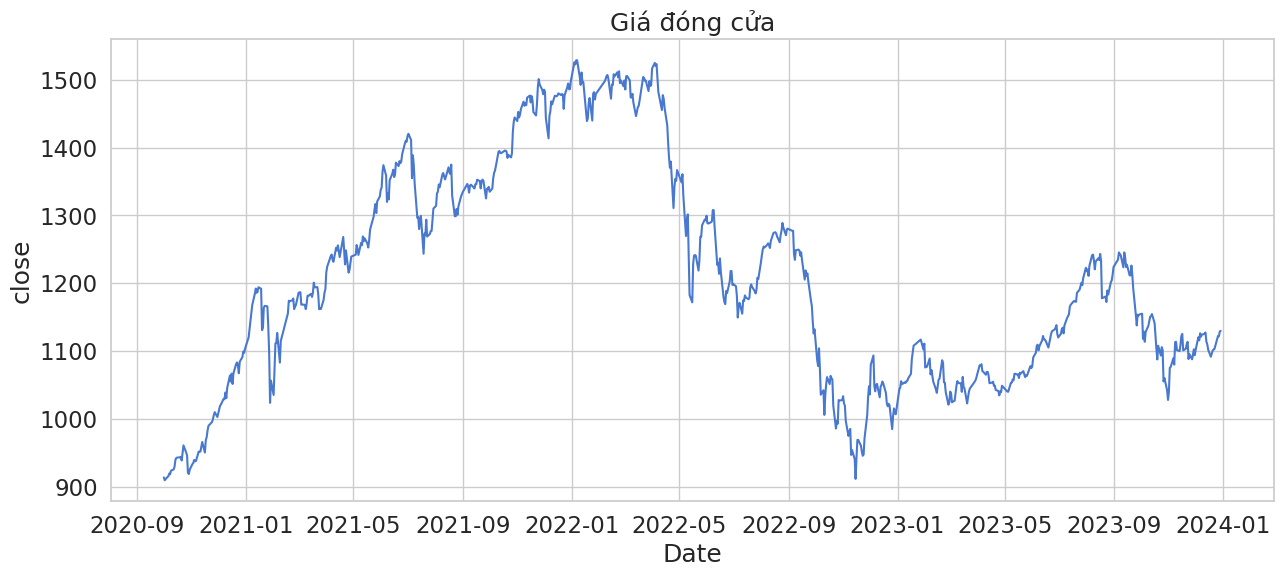

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['close'])
plt.ylabel('close')
plt.xlabel('Date')
plt.title('Giá đóng cửa')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00675654],
       [0.        ],
       [0.00771021],
       [0.00931045],
       [0.01585685],
       [0.01443442],
       [0.02277503],
       [0.02573304],
       [0.03224711],
       [0.04892833],
       [0.05309863],
       [0.05397149],
       [0.05460188],
       [0.05578185],
       [0.04706947],
       [0.06463971],
       [0.08300197],
       [0.06609446],
       [0.05909546],
       [0.01800666],
       [0.01482236],
       [0.02515113],
       [0.03842175],
       [0.04121812],
       [0.04824944],
       [0.04500048],
       [0.04587334],
       [0.06801797],
       [0.0678725 ],
       [0.06838975],
       [0.07980151],
       [0.09113245],
       [0.0660783 ],
       [0.09535124],
       [0.10283516],
       [0.1185627 ],
       [0.12945721],
       [0.13622992],
       [0.13876766],
       [0.1455242 ],
       [0.15527107],
       [0.16214076],
       [0.15059968],
       [0.15995862],
       [0.16876798],
       [0.17762584],
       [0.18035755],
       [0.194

In [ ]:
train_data = scaled_data[0:int(training_data_len),:]
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
      print(x_train)
      print(y_train)
      print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00675654, 0.        , 0.00771021, 0.00931045, 0.01585685,
       0.01443442, 0.02277503, 0.02573304, 0.03224711, 0.04892833,
       0.05309863, 0.05397149, 0.05460188, 0.05578185, 0.04706947,
       0.06463971, 0.08300197, 0.06609446, 0.05909546, 0.01800666,
       0.01482236, 0.02515113, 0.03842175, 0.04121812, 0.04824944,
       0.04500048, 0.04587334, 0.06801797, 0.0678725 , 0.06838975])]
[0.07980150648175077]

[array([0.00675654, 0.        , 0.00771021, 0.00931045, 0.01585685,
       0.01443442, 0.02277503, 0.02573304, 0.03224711, 0.04892833,
       0.05309863, 0.05397149, 0.05460188, 0.05578185, 0.04706947,
       0.06463971, 0.08300197, 0.06609446, 0.05909546, 0.01800666,
       0.01482236, 0.02515113, 0.03842175, 0.04121812, 0.04824944,
       0.04500048, 0.04587334, 0.06801797, 0.0678725 , 0.06838975]), array([0.        , 0.00771021, 0.00931045, 0.01585685, 0.01443442,
       0.02277503, 0.02573304, 0.03224711, 0.04892833, 0.05309863,
       0.05397149, 0.05460188, 0.

**Xây dựng mô hình LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
20/20 [==============================] - 5s 33ms/step - loss: 0.1509
Epoch 2/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0905
Epoch 3/100
20/20 [==============================] - 1s 32ms/step - loss: 0.0778
Epoch 4/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0746
Epoch 5/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0739
Epoch 6/100
20/20 [==============================] - 1s 32ms/step - loss: 0.0729
Epoch 7/100
20/20 [==============================] - 1s 32ms/step - loss: 0.0752
Epoch 8/100
20/20 [==============================] - 1s 32ms/step - loss: 0.0759
Epoch 9/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0724
Epoch 10/100
20/20 [==============================] - 1s 30ms/step - loss: 0.0722
Epoch 11/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0720
Epoch 12/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0719
Epoch 13/100
20/20 [=====

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 128)           66560     
                                                                 
 dense_2 (Dense)             (None, 30, 25)            3225      
                                                                 
 dense_3 (Dense)             (None, 30, 1)             26        
                                                                 
Total params: 69811 (272.70 KB)
Trainable params: 69811 (272.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


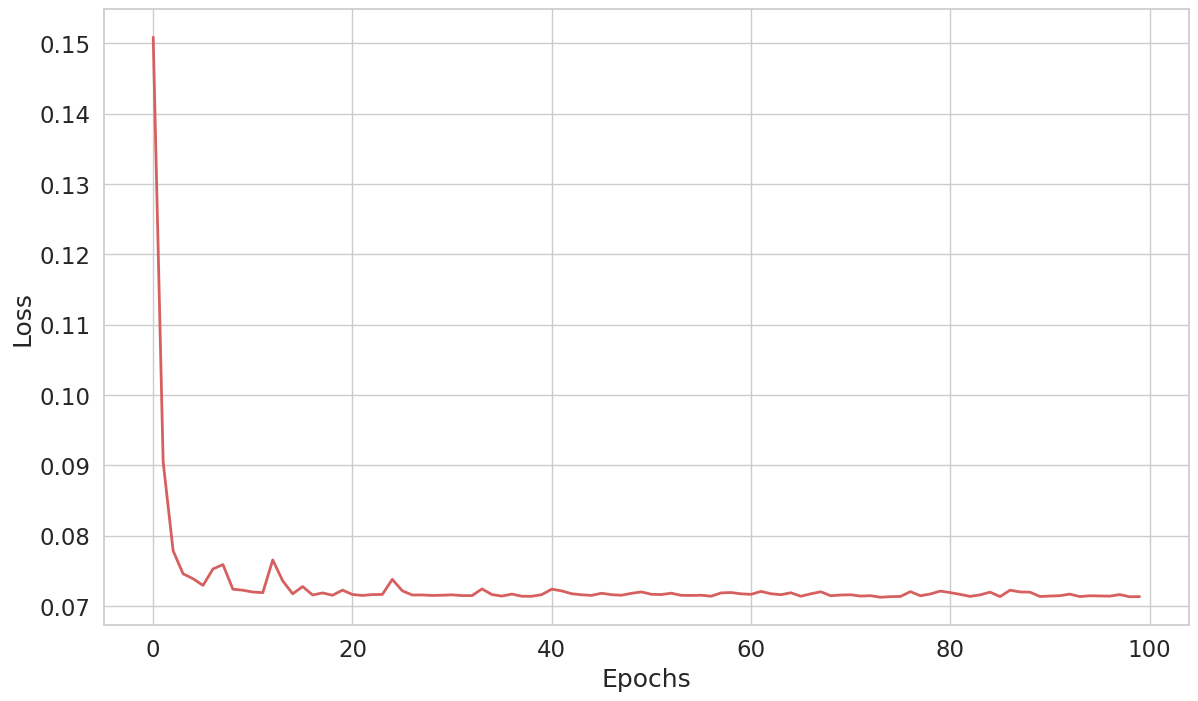

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', linewidth=2, label='Train loss')
#plt.plot(history.history['val_loss'], 'g', linewidth=2, label='Validation loss')
#plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
test_data = scaled_data[training_data_len-30:, :]
x_test = []
#y_test = scaled_data[training_data_len:, :]

for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 11ms/step


In [ ]:
predictions

array([[[0.5075692 ],
        [0.5194894 ],
        [0.52127945],
        ...,
        [0.5177172 ],
        [0.51844543],
        [0.51833355]],

       [[0.5079907 ],
        [0.52059513],
        [0.52107453],
        ...,
        [0.51844543],
        [0.51833355],
        [0.5183118 ]],

       [[0.50917554],
        [0.5204361 ],
        [0.5211177 ],
        ...,
        [0.5183336 ],
        [0.51831186],
        [0.5179211 ]],

       ...,

       [[0.51265633],
        [0.5237896 ],
        [0.5219635 ],
        ...,
        [0.5217008 ],
        [0.5226888 ],
        [0.52288383]],

       [[0.5128994 ],
        [0.5218978 ],
        [0.5222648 ],
        ...,
        [0.52268887],
        [0.5228839 ],
        [0.52266353]],

       [[0.5109433 ],
        [0.5222457 ],
        [0.52301264],
        ...,
        [0.52288395],
        [0.52266353],
        [0.5230894 ]]], dtype=float32)

In [ ]:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(rmse)

0.021472676086050555


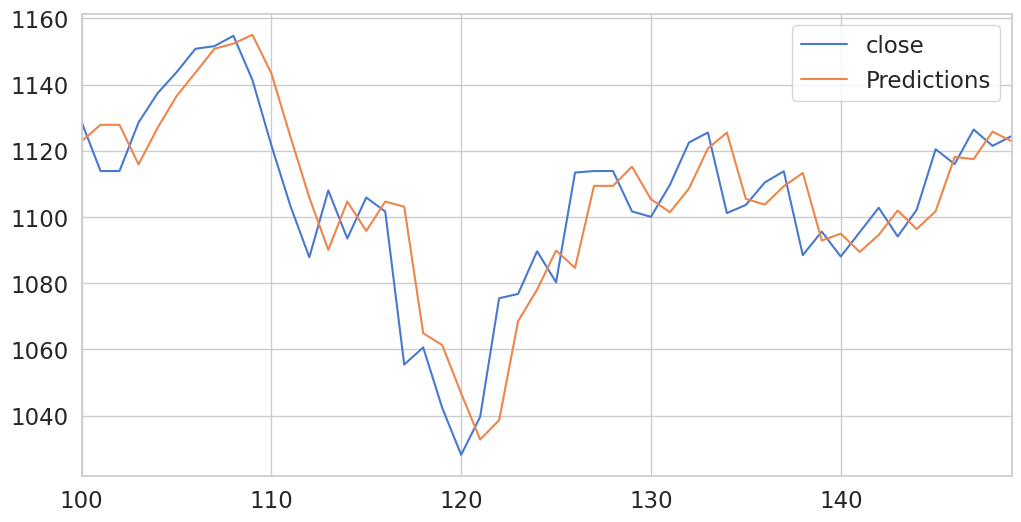

In [ ]:
valid[['close', 'Predictions']].iloc[100:150].plot(figsize=(12,6)).autoscale(axis='x', tight=True);

In [ ]:
valid = valid.merge(df[['time', 'close']], left_on='close', right_on='close', how='left')

valid

,close,Predictions,time
0,1065.91,1067.418457,2023-05-16
1,1060.44,1067.475220,2023-05-17
2,1068.31,1063.021362,2023-05-18
3,1067.07,1067.987427,2023-05-19
4,1070.64,1068.348999,2023-05-22
...,...,...,...
161,1117.66,1103.742676,2023-12-25
162,1122.25,1116.119141,2023-12-26
163,1121.99,1122.328247,2023-12-27
164,1128.93,1122.969482,2023-12-28


In [ ]:
new_valid['Chênh lệch'] = new_valid['close'] - new_valid['Predictions']

<ipython-input-95-af98361645a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_valid['Chênh lệch'] = new_valid['close'] - new_valid['Predictions']


In [ ]:
rmse = np.sqrt(np.mean(valid['Chênh lệch'] ** 2 ))
print(rmse)

12.16365964713854


In [ ]:
valid.drop('Phần dư', axis=1)


,time,close,Predictions,Chênh lệch
0,2023-05-16,1065.91,1064.752441,1.157559
1,2023-05-17,1060.44,1064.735718,-4.295718
2,2023-05-18,1068.31,1060.074707,8.235293
3,2023-05-19,1067.07,1065.610352,1.459648
4,2023-05-22,1070.64,1065.658081,4.981919
...,...,...,...,...
185,2023-12-25,1117.66,1099.952515,17.707485
186,2023-12-26,1122.25,1113.004639,9.245361
187,2023-12-27,1121.99,1119.068237,2.921763
188,2023-12-28,1128.93,1119.555542,9.374458


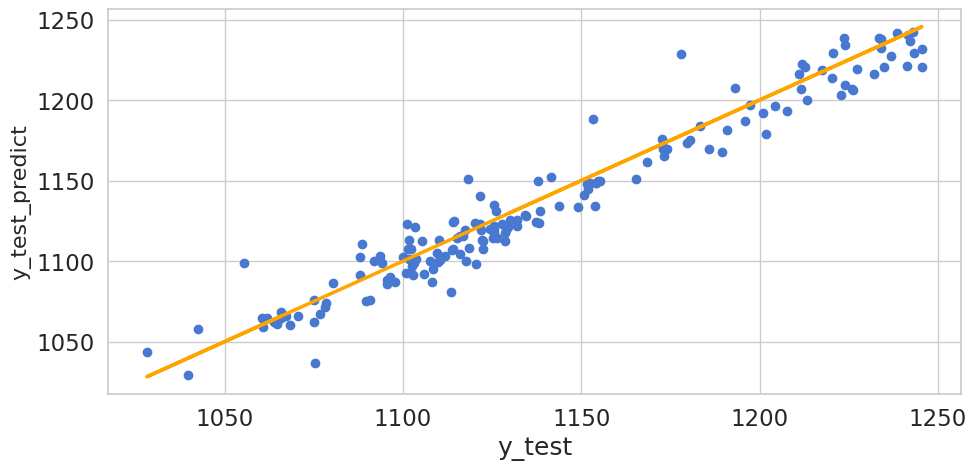

In [ ]:
fig = plt.figure(figsize=(11,5))
plt.scatter(valid['close'],valid['Predictions'])
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_predict', fontsize=16)

#Đường tuyến tính x = y
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")